# Assignment 2 - Machine Learning Basics

## *Ishan Gupta*
Netid:  *ig55*

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
- Understand the bias-variance tradeoff and the impact of model flexibility algorithm performance and model selections

In [82]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
%config InlineBackend.figure_format = 'retina'



### Added support for variable names in markdown to avoid hardcoding variable values.
## https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tree/master/src/jupyter_contrib_nbextensions/nbextensions/python-markdown

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

**1.** Better. Prevent overfitting.

**2.** Worse. Increases the chance for overfitting

**3.** Better. Since the model is highly non-linear, a more flexible model would be better.

**4.** Worse. A more flexible model will capture the error in variance, leading to overfitting

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

(a) (i) This is a regression problem. (ii) We are trying to obtain an inference in this case. (iii) n = 500, p = 3

(b) (i) This is a classification problem. (ii) We are trying to obtain a prediction in this case. (iii) n = 20, p = 13

(c) (i) This is a regression problem. (ii) We are trying to obtain a prediction in this case. (iii) n = 52, p = 3

# Practical Questions

## 3
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**Answer**

In [4]:
import numpy as np
import math
import statistics

### Initialize provided variables
X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])
color_map = {'r': 'red', 'b': 'blue'}

point = np.array([0,0,0])


def distance(x,y):
    ### Define euclidean distance for two points
    return math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
    
euc_distances = []
for a in X:
    dis = distance(a,point)
    euc_distances.append(dis)

def k_prediction(euc_distances, y, k):
    ### Sort by indices
    return sorted(range(len(euc_distances)), key=lambda i: euc_distances[i])[:k]

def k_results(vals, y):
    res = []
    for v in vals:
        res.append(y[v])
    return res

answer_hash = {}
for k in (1,3):
    k_pred_top_distance_indices = k_prediction(euc_distances, y, k)
    k_pred_top_outcomes = k_results(k_pred_top_distance_indices, y)
    answer_hash[k] = statistics.mode(k_pred_top_outcomes)

### Higher value of k would lead to higher generalization, which will capture points with high variance so
## the value of k should be small


**Answer**

**(a)**

*Table 1. Euclidean distance for dataset from point (0,0,0)*

| Obs. | $x_1$ | $x_2$ | $x_3$ | distance   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | {{ round(euc_distances[0],2) }}   |
| **2**| 2     | 0     | 0     | {{ round(euc_distances[1],2) }}  |
| **3**| 0     | 1     | 3     | {{ round(euc_distances[2],2) }}   |
| **4**| 0     | 1     | 2     | {{ round(euc_distances[3],2) }}  |
| **5**| -1    | 0     | 1     | {{ round(euc_distances[4],2) }}  |
| **6**| 1     | 1     | 1     | {{ round(euc_distances[5],2) }}   |


**(b)**

Our prediction when k = 1 is {{ color_map[answer_hash[1]] }}. This is because of observation 5 has the least distance from the point (0,0,0) and the outcome for observation 5 is blue. The results have also been verified programatically.



**(c)**

Our prediction when k = 3 is {{ color_map[answer_hash[3]] }}. This is because of observation 5,6 and 2 have the least 3 distances from the point (0,0,0) and the maximum outcomes for these observations is red. The results have also been verified programatically.


**(d)**

When the decision boundary is highly non linear, we don't want a smooth boundary which is the case when k is large. Therefore, the value of k should be small

## 4
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [83]:
# (a) Write your own kNN classifier
import pandas as pd
import io
import requests
import time
import numpy as np
class Knn:
    def __init__(self, n_neighbors = 1):
        self.k = n_neighbors
        pass
                    
    def fit(self, X, y):
        self.x_train = X
        self.y_train = y
        
    def predict(self, x_test):
        rows = self.x_train.shape[0]
        y_hat = []
        for x_te in x_test:
            tile = np.tile(x_te,(rows,1)) ### for every test observation, create a matrix. 
            ## eg. [1,2] is x_test observation and train has 2 observations it returns: [[1,2], [1,2]]
            
            distances = np.linalg.norm(self.x_train - tile, axis = 1) ## find distance from all training points
            indices = distances.argsort()[:self.k] ### top k distance indices
            
            top_outcomes = self.y_train[indices] ## top y outcomes
            counts = np.bincount(top_outcomes.astype(int)) ## counts of each y
            
            y_hat.append(np.argmax(counts)) ## y with max count
        return y_hat
            
    
def accuracy(y, y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy    

In [84]:
## (b)
## We read the file directly from remote to minimize human error, as well as make the code standardized for any system
req_hash = {}
for dimension_type in ("low", "high"):
    req_hash[dimension_type] = {}
    for typ in ("train", "test"):
        for res in ("X", "y"):
            url = "https://raw.githubusercontent.com/kylebradbury/ids705/master/assignments/data/A2_"+res+"_"+typ+"_"+dimension_type+".csv"
            s = requests.get(url).content
            req_hash[dimension_type][("_".join([res,typ]))] = np.genfromtxt(io.StringIO(s.decode('utf-8')),delimiter=',')

current_time = time.time()
knn_classifier = Knn(n_neighbors = 5)
knn_classifier.fit(req_hash["low"]["X_train"], req_hash["low"]["y_train"])
predicted_y_hat = knn_classifier.predict(req_hash["low"]["X_test"])
time_taken_low_dimensional_data_set = time.time() - current_time
low_dim_accuracy = accuracy(req_hash["low"]["y_test"], predicted_y_hat)

current_time = time.time()
knn_classifier = Knn(n_neighbors = 5)
knn_classifier.fit(req_hash["high"]["X_train"], req_hash["high"]["y_train"])
predicted_y_hat = knn_classifier.predict(req_hash["high"]["X_test"])
time_taken_high_dimensional_data_set = time.time() - current_time
high_dim_accuracy = accuracy(req_hash["high"]["y_test"], predicted_y_hat)

**(c)**

**For our own built Knn classifier**

(i) The time taken for predicting low dimensional dataset is **{{ round(time_taken_low_dimensional_data_set,2) }}**.

(ii) The accuracy on low dimensional dataset is **{{ low_dim_accuracy }}**.

(iii) The time taken for predicting high dimensional dataset is **{{ round(time_taken_high_dimensional_data_set,2) }}**.

(iv) The accuracy on low dimensional dataset is **{{ high_dim_accuracy }}**.

In [85]:
from sklearn.neighbors import KNeighborsClassifier
current_time = time.time()
neigh = KNeighborsClassifier(n_neighbors=5)
fit = neigh.fit(req_hash["low"]["X_train"], req_hash["low"]["y_train"])
y_hat = neigh.predict(req_hash["low"]["X_test"])
time_taken_low_dim_sklearn = time.time() - current_time
low_dim_accuracy_sklearn = accuracy(req_hash["low"]["y_test"], y_hat)

current_time = time.time()
neigh = KNeighborsClassifier(n_neighbors=5)
fit = neigh.fit(req_hash["high"]["X_train"], req_hash["high"]["y_train"])
y_hat = neigh.predict(req_hash["high"]["X_test"])
time_taken_high_dim_sklearn = time.time() - current_time
high_dim_accuracy_sklearn = accuracy(req_hash["high"]["y_test"], y_hat)

**(c)**

**For Sklearn Knn classifier**

(i) The time taken for predicting low dimensional dataset is **{{ round(time_taken_low_dim_sklearn,2) }}**.

(ii) The accuracy on low dimensional dataset is **{{ low_dim_accuracy_sklearn }}**.

(iii) The time taken for predicting high dimensional dataset is **{{ round(time_taken_high_dim_sklearn,2) }}**.

(iv) The accuracy on low dimensional dataset is **{{ high_dim_accuracy_sklearn }}**.

**(d) Comparison between our custom Knn classifier and Sklearn Knn classifier**

(i) The accuracy of both the classifiers on both the data sets is the same.

(ii) The time taken by our custom classifier on low dimensional dataset is **{{ round((time_taken_low_dimensional_data_set/time_taken_low_dim_sklearn),2) }}** times more than the time taken on low dimensional dataset by sklearn Knn classifier

(iii) The time taken by our custom classifier on high dimensional dataset is **{{ round((time_taken_high_dimensional_data_set/time_taken_high_dim_sklearn),2) }}** times more than the time taken on high dimensional dataset by sklearn Knn classifier

**(e)**

(i) Realtime predicions might be slow.

(ii) Computationally expensive. End up having to store all the training data in memory even after the model has been fit.

(iii) Higher hardware requirements



## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**Answer**

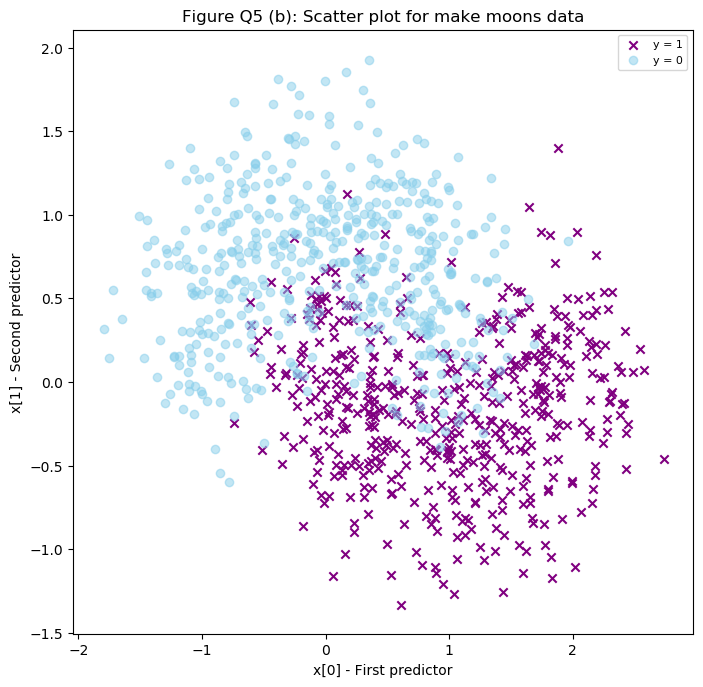

In [15]:
#### (a & b)
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
### (a)
data = make_moons(n_samples=1000, noise = 0.35)


### Filter values
### (b)
y_1s = data[1][data[1] == 1]
y_0s = data[1][data[1] == 0]

x_1s = data[0][data[1] == 1]
x_0s = data[0][data[1] == 0]


colors = ['purple', 'skyblue']
plt.figure(num=None, figsize=(8, 8), dpi=100)
xy_1s = plt.scatter(x_1s[:,0], x_1s[:,1],marker='x', color=colors[0])
xy_0s = plt.scatter(x_0s[:,0], x_0s[:,1], marker='o', color=colors[1], alpha = 0.5)
plt.title("Figure Q5 (b): Scatter plot for make moons data")
plt.xlabel("x[0] - First predictor")
plt.ylabel("x[1] - Second predictor")
plt.legend((xy_1s, xy_0s),
           ('y = 1', 'y = 0'),
           scatterpoints=1,
           fontsize=8)

plt.show()

In [11]:
### Question 5(c)
from sklearn.neighbors import KNeighborsClassifier
dataset_hash = {}
for i in range(3):
    dataset_hash[i] = {}
    ### Select random indices, and then filter out data
    indices = np.random.choice(1000, 100, replace = False)
    dataset_hash[i]["x_train"] = data[0][indices]
    dataset_hash[i]["y_train"] = data[1][indices]
    dataset_hash[i]["fit"] = {}
    for k in (1,25,50):
        neigh = KNeighborsClassifier(n_neighbors=k)
        fit = neigh.fit(data[0][indices], data[1][indices])
        dataset_hash[i]["fit"][k] = fit
### data structure format
## {data_sample_number:{"fit":{1: fit, 3:fit, 50: fit}}}
    

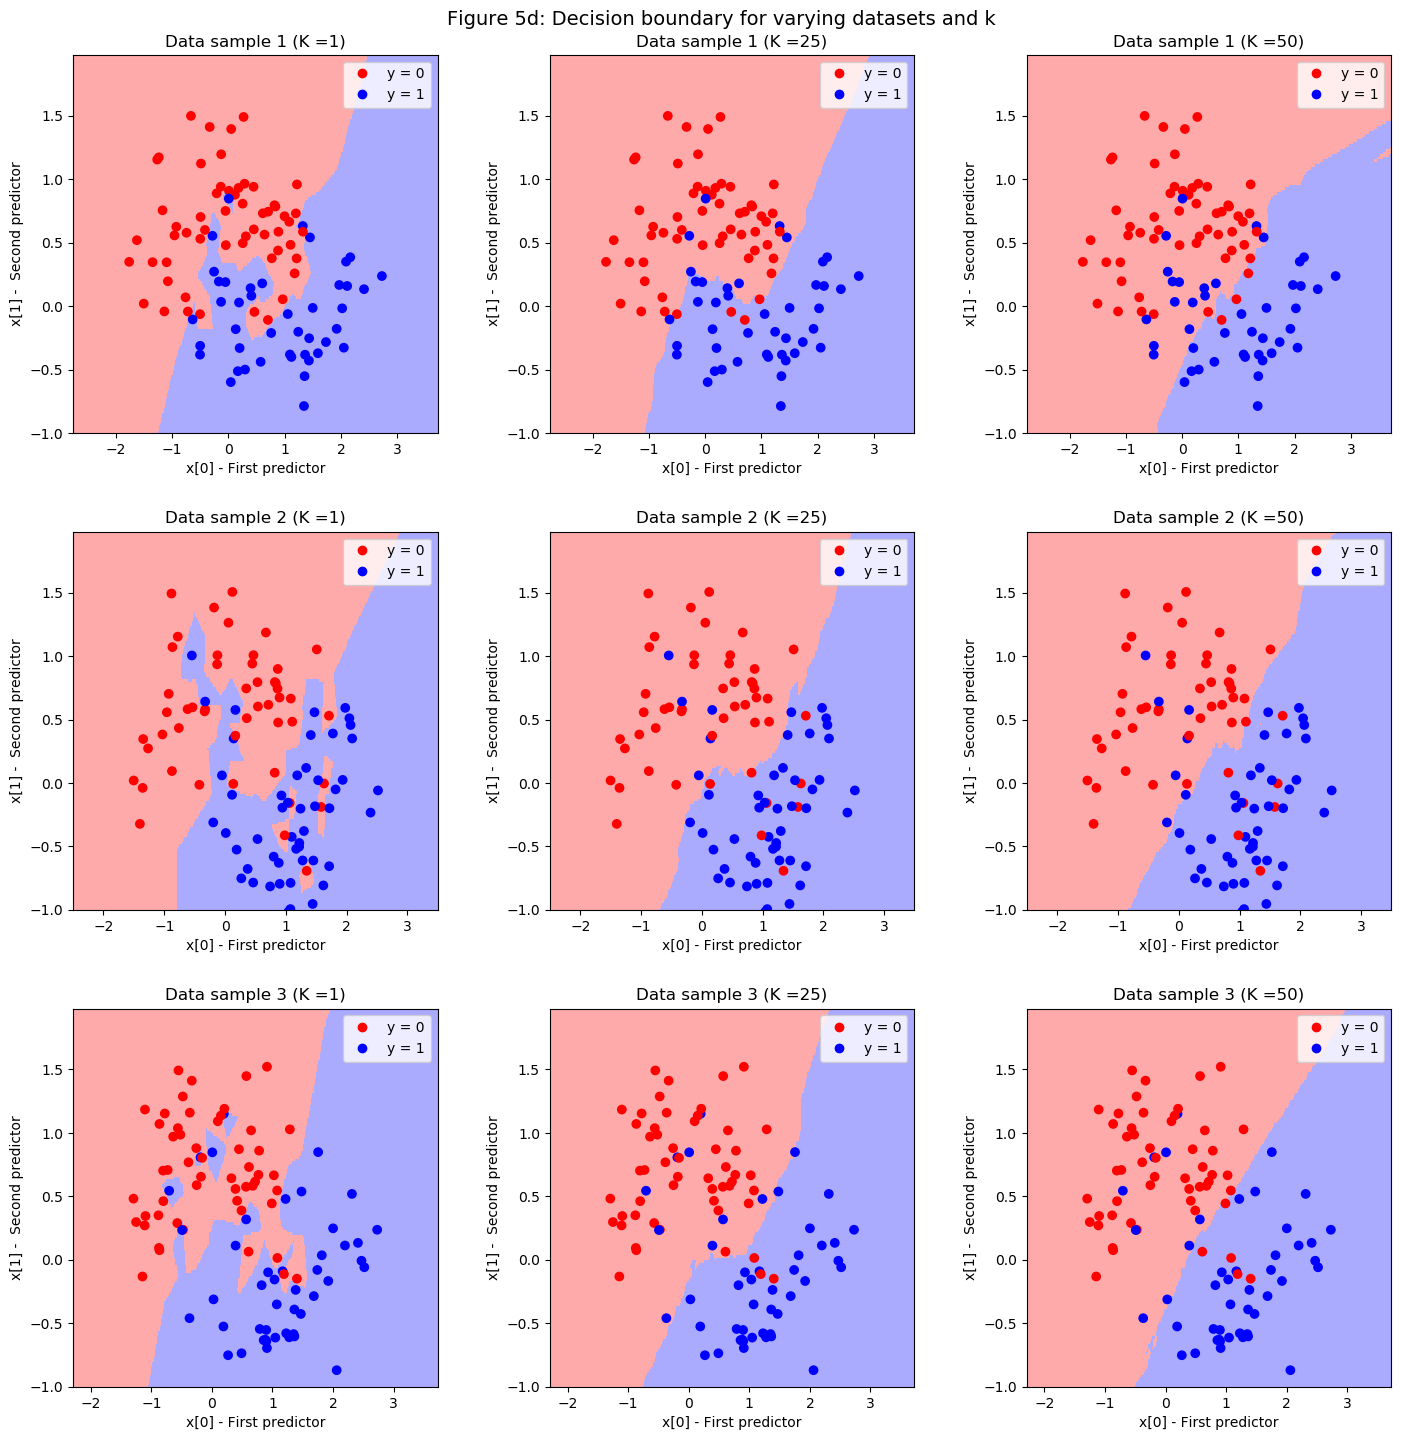

In [19]:
### Question 5(d)
### https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
fig, a = plt.subplots(3, 3,figsize=(15,15), dpi = 100)
fig.tight_layout(pad=5.0)
plt.grid(True)
i,j,h = 0,0,0.02
### iterate over axes
for key in dataset_hash:

    x_min, x_max = dataset_hash[key]["x_train"][:, 0].min() - 1, dataset_hash[key]["x_train"].max() + 1
    y_min, y_max = dataset_hash[key]["y_train"].min() - 1, dataset_hash[key]["y_train"].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    
    for key_1 in dataset_hash[key]["fit"]:
        Z = dataset_hash[key]["fit"][key_1].predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        a[i][j].pcolormesh(xx, yy, Z, cmap=cmap_light)
        scatter = a[i][j].scatter(dataset_hash[key]["x_train"][:,0], dataset_hash[key]["x_train"][:,1], c= dataset_hash[key]["y_train"], cmap=cmap_bold)

        a[i][j].set_xlim(xx.min(), xx.max())
        a[i][j].set_ylim(yy.min(), yy.max())
        a[i][j].set_title("Data sample "+ str(i+1) + " (K ="+str(key_1)+")")
        a[i][j].legend(handles=scatter.legend_elements()[0], labels=["y = 0", "y = 1"])
        a[i][j].set_xlabel("x[0] - First predictor")
        a[i][j].set_ylabel("x[1] -  Second predictor")
        j += 1
    i += 1
    j = 0
fig.suptitle('Figure 5d: Decision boundary for varying datasets and k', fontsize=14)
plt.show()

**ANSWER**

**(e)** 
We observe that as the value of k increase the border becomes more generalized. When k = 50, the decision boundary seems to be the same for all data sets. When k = 1, varaiance of individual data points is capture, and the decision boundary is very flexible. k = 25 seems to be the best differentiator to separate both classes. k = 1 decision boundary varies the most with data change

**(f)** 
As we move across columns from left to right the bias increases and variance decreases, the decision boundary is more generalized. k = 1 that is the first column has the highest variance and lowest bias.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**Answer**

In [87]:
### 6a
test_data = make_moons(n_samples=1000, noise = 0.35)
req_hash = {}
## Store errors in array such that error at k is stored at index k - 1
training_errors = []
test_errors = []
## 6b
for k in range(1, 501):
    neigh = KNeighborsClassifier(n_neighbors=k)
    fit = neigh.fit(data[0], data[1])
    training_prediction = fit.predict(data[0])
    training_error_rate = 1 - accuracy(data[1], training_prediction)
    
    test_prediction = fit.predict(test_data[0])
    test_error_rate = 1 - accuracy(test_data[1], test_prediction)
    training_errors.append(training_error_rate)
    test_errors.append(test_error_rate)


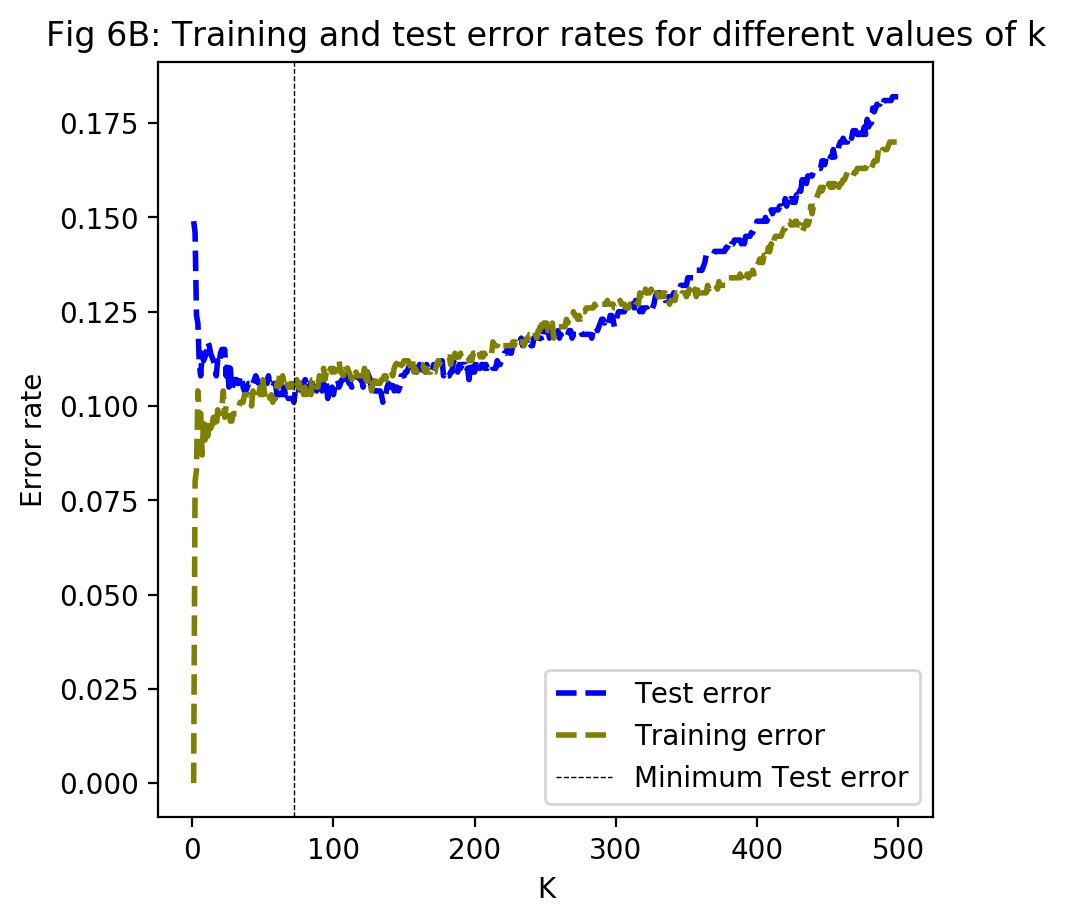

In [97]:
## 6b
plt.figure(num=None, figsize=(5, 5), dpi=100, facecolor='w', edgecolor='k')
plt.plot(list(range(1,501)), test_errors, marker='', color='blue', linewidth=2, linestyle='dashed', label="Test error")
plt.plot(list(range(1,501)), training_errors,  marker='', color='olive', linewidth=2, linestyle='dashed', label="Training error")
plt.axvline(test_errors.index(min(test_errors)) + 1, color='black', linewidth=0.5, linestyle='dashed', label = "Minimum Test error")
plt.xlabel("K")
plt.ylabel("Error rate")
plt.title("Fig 6B: Training and test error rates for different values of k")
plt.legend()
plt.show()

**ANSWER**

**(c)** 
We observe that at k = 1, the training error is 0 as expected, but the test error is the maximum. As the value of k increases we see a decrease in test error rates, but after a point the error rate starts increasing again. This is because as k increases model becomes more generalized and after a point higher bias might not be optimal for predicting test set

**(d)** 

k = 1 represents high variance and k = 500 represent high bias

**(e)**

The optimal value of k is **{{test_errors.index(min(test_errors)) + 1}}**, such that the test error is minimum. It gives us an optimal bias-variance tradeoff.

**(f)** 

In a linear regression model or other models, we can potentially make the model so complex that our MSE on training set is close to 0. In which case the regression coefficients represent the noise rather than the genuine relationships in the population. This would represent a highly flexible model, which captures variance of all the data points.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given training and testing data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**Answer**

In [22]:
url = "https://raw.githubusercontent.com/kylebradbury/ids705/master/assignments/data/A2_Q7_train.csv"
s=requests.get(url).content
training_data = np.genfromtxt(io.StringIO(s.decode('utf-8')),delimiter=',')

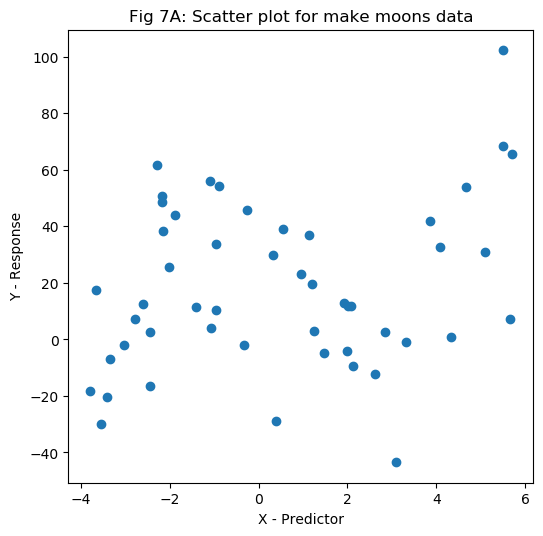

In [25]:
y = training_data[1:, 2]
X = training_data[1:, [1]]
plt.figure(num=None, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(X, y)
plt.xlabel("X - Predictor")
plt.ylabel("Y - Response")
plt.title("Fig 7A: Scatter plot for make moons data")
plt.show()

In [78]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
non_transformed_reg = LinearRegression().fit(X, y)
pred = non_transformed_reg.predict(X)
coeff = non_transformed_reg.coef_
intercept = non_transformed_reg.intercept_
r_squared = r2_score(y, pred)
mean_squared_error = mse(y, pred)


**(b)**

The equation for this linear regression is 

**y = {{round(coeff[0],2)}}x + {{round(intercept,2)}}**

The R-squared on training set is **{{round(r_squared,3)}}**

The MSE on training set is **{{round(mean_squared_error,3)}}**

In [79]:
transformed = np.sin(X-1)
final_X = np.concatenate((X,transformed),axis = 1)
reg = LinearRegression().fit(final_X, y)
coeff_transformed = reg.coef_
intercept_transformed = reg.intercept_
pred = reg.predict(final_X)
r_squared_transformed = r2_score(y, pred)
mean_squared_error_transformed = mse(y, pred)
transformed_equation_latex = '$y='+str(round(coeff_transformed[0],2))+'*x+'+str(round(coeff_transformed[1],2))+'\sin(x-1)+'+''+str(round(intercept_transformed,2))+'$'
non_transformed_equation_latex = '$y='+str(round(coeff[0],2))+'*x+'+str(round(intercept,2))+'$'

**(c)**

The equation for this linear regression is 

**y = {{round(coeff_transformed[0],2)}}x + {{round(coeff_transformed[1],2)}}*sin(x - 1) +{{round(intercept_transformed,2)}}**

The R-squared on training set is **{{round(r_squared_transformed,3)}}**

The MSE on training set is **{{round(mean_squared_error_transformed,3)}}**

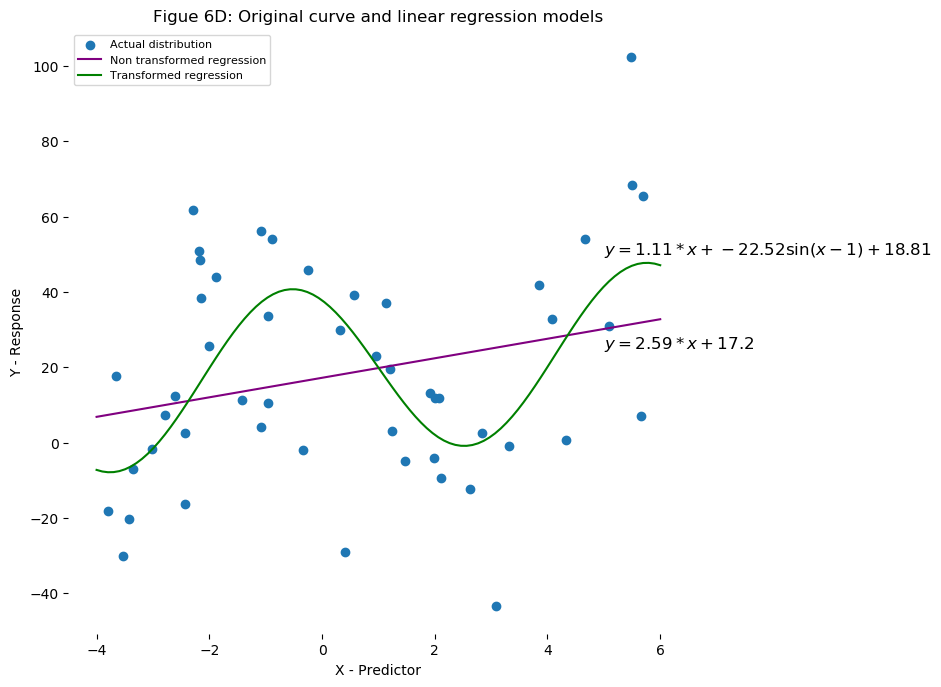

In [81]:
plt.figure(num=None, figsize=(8, 8), dpi=100, facecolor='w', edgecolor='k', frameon=False)
### Remove borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)
scatter = plt.scatter(X, y)
X_plot = np.linspace(-4,6,100)
### The reason for unwanted commas - https://stackoverflow.com/questions/11983024/matplotlib-legends-not-working
### 
non_transformed_reg_1, = plt.plot(X_plot, X_plot*coeff[0] + intercept, color='purple')
X_plot_transformed = np.sin(X_plot - 1)*coeff_transformed[1] + X_plot*coeff_transformed[0] + intercept_transformed
transformed_reg, = plt.plot(X_plot, X_plot_transformed, color='green')
plt.xlabel("X - Predictor")
plt.ylabel("Y - Response")
plt.legend((scatter, non_transformed_reg_1, transformed_reg),
           ('Actual distribution', 'Non transformed regression', 'Transformed regression'),
           fontsize=8)
plt.text(5, 50, transformed_equation_latex, fontsize=12)
plt.text(5, 25, non_transformed_equation_latex, fontsize=12)

plt.title("Figue 6D: Original curve and linear regression models")
plt.show()

In [90]:
### E
url = "https://raw.githubusercontent.com/kylebradbury/ids705/master/assignments/data/A2_Q7_test.csv"
s=requests.get(url).content
test_data = np.genfromtxt(io.StringIO(s.decode('utf-8')),delimiter=',')

y_test = test_data[1:, 2]
X_test = test_data[1:, [1]]

### non transformed prediction
pred = non_transformed_reg.predict(X_test)
r_squared_test = r2_score(y_test, pred)
mean_squared_error_test = mse(y_test, pred)

### transformed prediction
transformed_X_test = np.sin(X_test - 1)
final_X_test = np.concatenate((X_test,transformed_X_test),axis = 1)
pred = reg.predict(final_X_test)
r_squared_test_transformed = r2_score(y_test, pred)
mean_squared_error_test_transformed = mse(y_test, pred)

**(e)** 
  
  

| Model | data | r_sqaured | MSE |
|------|-------|-------|-------|
| non transformed | train     | {{round(r_squared, 3)}}   | {{round(mean_squared_error, 3)}}     |
| transformed | train     | {{round(r_squared_transformed, 3)}}   | {{round(mean_squared_error_transformed, 3)}}     |
| non transformed | test     | {{round(r_squared_test, 3)}}   | {{round(mean_squared_error_test, 3)}}     |
| transformed | test     | {{round(r_squared_test_transformed, 3)}}   | {{round(mean_squared_error_test_transformed, 3)}}     |

  
  
**(f)** 

Our transformed model performs better on training data as well as the test data. Transformations were done assuming the data distribution for training data which makes it fit better.

**(g)** 

Model has been fit knowing the distribution of training set. If the test set was very different, it would negatively impact our predictive capacity as the model would predict based on the distribution of training set